<a href="https://colab.research.google.com/github/surabhithakare2128/TensorFlow/blob/master/FahrenheittoCelsius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import dependencies

In [0]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [0]:
import numpy as np

## Setting up training data

In [9]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


## Creating a model

### Build a layer

In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Assemble layers into model

In [0]:
ftocmodel = tf.keras.Sequential([l0]) #l0 is the name of layer

OR you can also do

ftocmodel = tf.keras.Sequential([
       tf.keras.layers.Dense(units=1, input_shape=[1])
])

## Compiling model with loss and optimizer functions

In [0]:
ftocmodel.compile(loss='mean_squared_error',
                 optimizer=tf.keras.optimizers.Adam(0.1))

## Train the model

In [14]:
history = ftocmodel.fit(celsius_q,fahrenheit_a,epochs=500,verbose=False)
print("Training Finished")

Training Finished


## Displaying training statistics

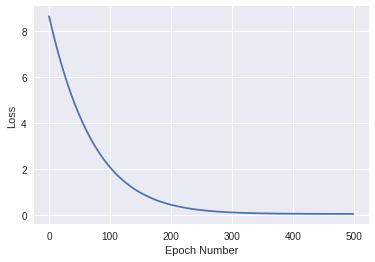

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.plot(history.history['loss'])

## Use the model to predict 

In [28]:
print(ftocmodel.predict([100])) #actual answer should be 212

[[211.74289]]


In [30]:
print(ftocmodel.predict([0, 10]))

[[31.92086]
 [49.90306]]


## Looking at the layer weights

In [31]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.7982202]], dtype=float32), array([31.92086], dtype=float32)]


# Experimenting with other characteristics

In [37]:
ftocmodel1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

ftocmodel1.compile(loss='mean_squared_error',
                 optimizer=tf.keras.optimizers.Adam(0.1))

history = ftocmodel1.fit(celsius_q,fahrenheit_a,epochs=30000,verbose=False)
print("Training Finished")

print(ftocmodel1.predict([100]))

Training Finished
[[211.77554]]


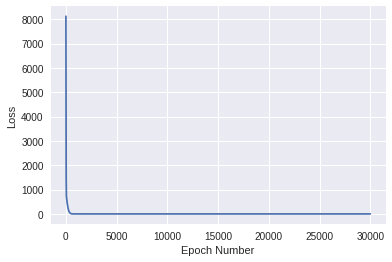

In [38]:
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.plot(history.history['loss'])

In [41]:
print("These are the layer variables: {}".format(ftocmodel1.get_weights()))

These are the layer variables: [array([[1.7982274]], dtype=float32), array([31.952805], dtype=float32)]


# This shows that the performance may not improve after a particular number of epochs